Fútbol Match Highlights<br>
Face vs Object Model - Capstone 2<br>
Tom Widdows

This notebook trains and saves a model that can distinguish between faces and objects (non-faces). <br><br>
Face detection is the process of identifying faces in an image.  Face recognition is the process of recognizing a face that was detected.  During the process of face detection, the detector will often incorrectly identify objects (non-faces) as faces.  The images below show 4 **"faces"** detected from images.

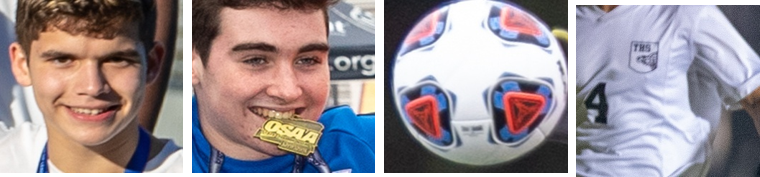

The main application loads this model and verifies that detected faces in the current image are not objects (non-faces) before attempting facial recognition.  This notebooks purpose is to train and save a model for later use in the main application.

##### Housekeeping...

In [1]:
#import required modules
import sys
sys.path.append('../../code')
import settings as s

import cv2
from lightgbm import LGBMClassifier
import numpy as np 
import pandas as pd 
from pathlib import Path
import pickle
import random
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from support_class import Fball, time_it
import time

start_all = time.time()  # track time for notebook to run
%matplotlib inline

Using TensorFlow backend.


##### Common variables and settings...

In [2]:
# variables used throughout the notebook
random.seed(14)
vec_size = 64  # pixel width & height (square) of training vector, vec is vec_size * vec_size

# save figure unique filenames
cm_valid_fig = Fball.checkfile('06 - 02 Baseline Face vs Object Model CM Valid.jpg')
cm_test_fig = Fball.checkfile('06 - 02 Baseline Face vs Object Model CM Test.jpg')

#### Load our two datasets

In [3]:
faces = [f for f in Path(s.FACE_VS_OBJECT_DATASET_jn / 'baseline_faces').iterdir()]
no_faces = [f for f in Path(s.FACE_VS_OBJECT_DATASET_jn / 'baseline_objects').iterdir()]
Fball.count_summary([faces, no_faces], ['images with faces', 'images with objects (no_faces)', 'total images'])

200 images with faces
264 images with objects (no_faces)
464 total images


#### Read the images in each set, convert to grayscale and resize 

In [4]:
# feature engineering for faces - read image, convert to grayscale and resize
faces_vecs = []
for face in faces:
    image = cv2.imread(str(face), cv2.IMREAD_GRAYSCALE)
    vec = cv2.resize(image, (vec_size, vec_size)).flatten()
    faces_vecs.append(vec)

In [5]:
# feature engineering for objects (non-faces) - read image, convert to grayscale and resize
no_faces_vecs = []
for no_face in no_faces:
    image = cv2.imread(str(no_face), cv2.IMREAD_GRAYSCALE)
    vec = cv2.resize(image, (vec_size, vec_size)).flatten()
    no_faces_vecs.append(vec)

#### Combine the data

In [6]:
df = pd.DataFrame()
df = df.append(faces_vecs)
df = df.append(no_faces_vecs)
feature_names = list(range(vec_size**2))
df.columns = feature_names

##### Scale and split the data

In [7]:
# prepare and split the data
X = df
y = np.concatenate((np.ones(len(faces_vecs)), np.zeros(len(no_faces_vecs))))

scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = feature_names

X_train, y_train, X_valid, y_valid, X_test, y_test, X_train_and_valid, y_train_and_valid = Fball.train_valid_test(X, y, hyperopt_train_set=False)


Total Data:                     464  100%  X

Test (holdout) data:             47   10%  X_test
Train and Validation data:      417   90%  X_train_and_valid

Train data:                     333   72%  X_train
Validation data:                 84   18%  X_valid



##### Train classifier on the train data and predict on the validation data

The baseline score (roc_auc) on the validation set is 91.87%



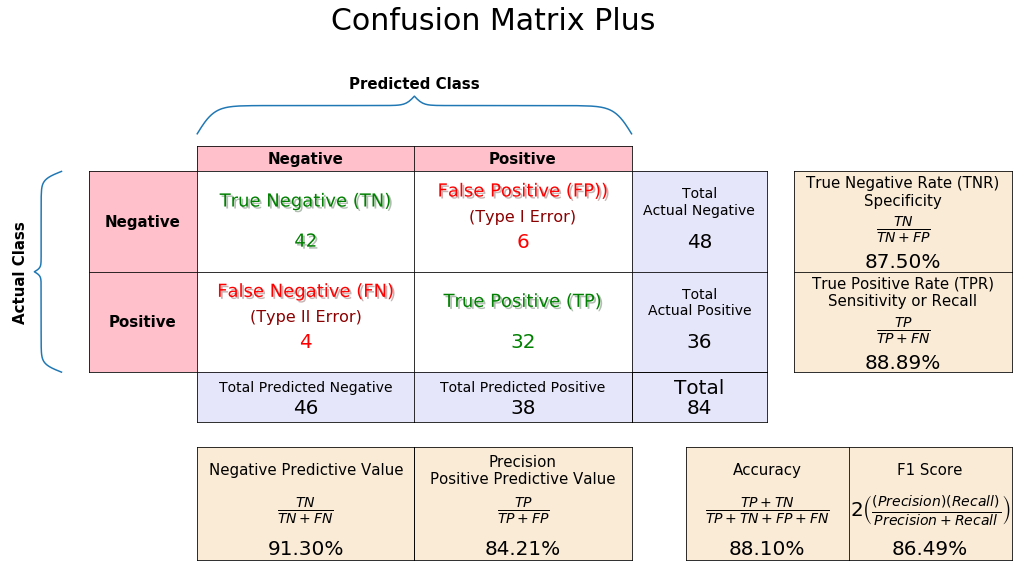


The kappa score is 75.86%

The MCC score is 75.95%

00:00:01


In [8]:
model = KNeighborsClassifier(29)
y_pred_prob = Fball.eval_model_valid(model, X_train, y_train, X_valid, y_valid, print_kappa=True, print_mcc=True, save_fig=cm_valid_fig)

The baseline score (roc_auc) on the validation set is 94.26%



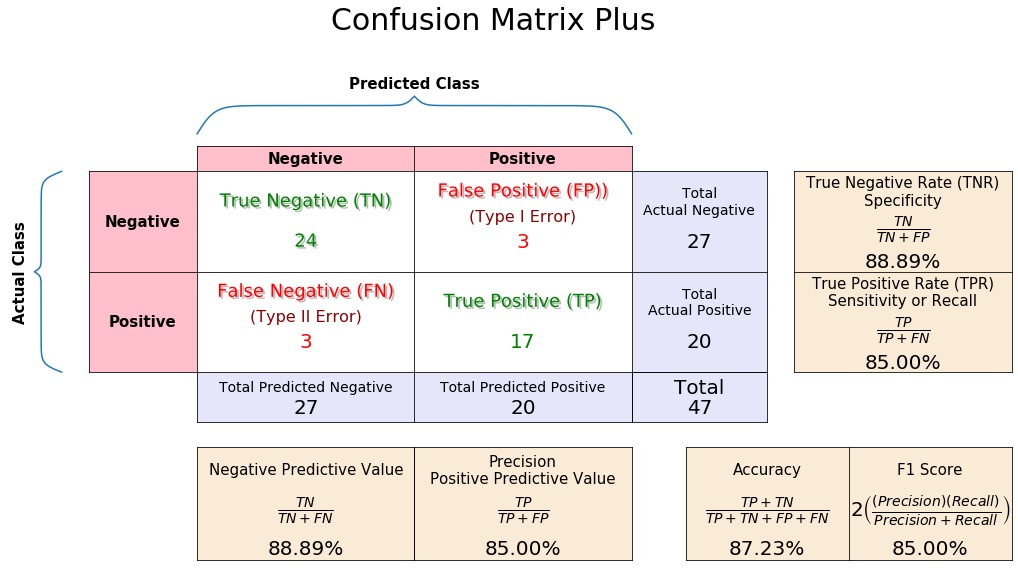


The kappa score is 73.89%

The MCC score is 73.89%

00:00:01


In [9]:
y_pred_prob = Fball.eval_model_valid(model, X_train, y_train, X_test, y_test, print_kappa=True, print_mcc=True, save_fig=cm_test_fig)

##### Save the model

In [10]:
# save the model to disk
Fball.save_model(model, 'baseline_face_vs_object_model')
Fball.save_model(scaler, 'baseline_face_vs_object_scaler')

In [11]:
print(f'{time.strftime("%H:%M:%S", time.gmtime(int(time.time() - start_all)))}')

00:00:05
